![picture](https://drive.google.com/uc?export=view&id=1eCsjNAtjXuXfqBLxeEnsBpOikUO06msr)

<br>

---
---

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Foundations of Artificial Intelligence<br> (AI701-Fall2022) </span><h1>

<h2><span style="color:green"> Lab-08 </span><h2>
</div>

---
---

**Multi-layer Perceptron (MLP)** is a supervised learning algorithm that learns
a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset,
where $m$ is the number of dimensions for input and $o$ is the
number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$
and a target $y$, it can learn a non-linear function approximator for either
classification or regression. It is different from logistic regression, in that
between the input and the output layer, there can be one or more non-linear
layers, called hidden layers. Figure 1 shows a one hidden layer MLP with scalar
output.



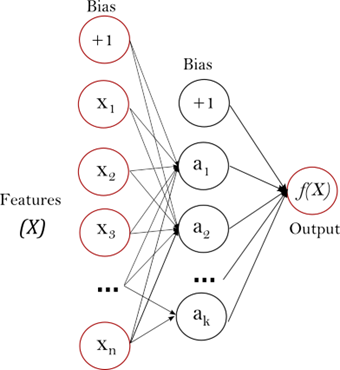

The leftmost layer, known as the input layer, consists of a set of neurons
$\{x_i | x_1, x_2, ..., x_m\}$ representing the input features. Each
neuron in the hidden layer transforms the values from the previous layer with
a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed
by a non-linear activation function $g(\cdot):R \rightarrow R$ - like
the hyperbolic tan function. The output layer receives the values from the
last hidden layer and transforms them into output values.

The module contains the public attributes ``coefs_`` and ``intercepts_``.
``coefs_`` is a list of weight matrices, where weight matrix at index
$i$ represents the weights between layer $i$ and layer
$`i+1$. ``intercepts_`` is a list of bias vectors, where the vector
at index $i$ represents the bias values added to layer $i+1$.

The advantages of Multi-layer Perceptron are:

    + Capability to learn non-linear models.

    + Capability to learn models in real-time (on-line learning)
      using ``partial_fit``.


The disadvantages of Multi-layer Perceptron (MLP) include:

    + MLP with hidden layers have a non-convex loss function where there exists
      more than one local minimum. Therefore different random weight
      initializations can lead to different validation accuracy.

    + MLP requires tuning a number of hyperparameters such as the number of
      hidden neurons, layers, and iterations.

    + MLP is sensitive to feature scaling.

## Classification

`MLPClassifier` implements a multi-layer perceptron (MLP) algorithm
that trains using `Backpropagation'.

MLP trains on two arrays: array X of size (n_samples, n_features), which holds
the training samples represented as floating point feature vectors; and array
y of size (n_samples,), which holds the target values (class labels) for the
training samples:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
X

[[0.0, 0.0], [1.0, 1.0]]

In [ ]:
y

[0, 1]

After fitting (training), the model can predict labels for new samples:

In [ ]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

MLP can fit a non-linear model to the training data. ``clf.coefs_``
contains the weight matrices that constitute the model parameters:

In [ ]:
clf.coefs_

[array([[-0.14196276, -0.02104562, -0.85522848, -3.51355396, -0.60434709],
        [-0.69744683, -0.9347486 , -0.26422217, -3.35199017,  0.06640954]]),
 array([[ 0.29164405, -0.14147894],
        [ 2.39665167, -0.6152434 ],
        [-0.51650256,  0.51452834],
        [ 4.0186541 , -0.31920293],
        [ 0.32903482,  0.64394475]]),
 array([[-4.53025854],
        [-0.86285329]])]

In [ ]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

It minimizes the Cross-Entropy loss function, giving a vector
of probability estimates $P(y|x)$ per sample $x$:

In [ ]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

The model supports `multi-label classification`
in which a sample can belong to more than one class. For each class, the raw
output passes through the logistic function. Values larger or equal to `0.5`
are rounded to `1`, otherwise to `0`. For a predicted output of a sample, the
indices where the value is `1` represents the assigned classes of that sample::

In [ ]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(X, y)

clf.predict([[1., 2.]])

clf.predict([[0., 0.]])

### Classification Example: Diabetes Classification

Step 1 - Load the Required Libraries and Modules

In [ ]:
# Import required libraries
import pandas as pd
# from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


Step 2 - Read the Data and Performing Basic Data Checks

In [ ]:
df = pd.read_csv('diabetes.csv') 

print(df.shape)

df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Step 3 - Create Arrays for the Features and the Response Variable

In [ ]:
target_column = ['Outcome'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
Age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.0


Step 4 - Create the Training and Test Datasets

In [ ]:
X = df[predictors].values
y = df[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


Step 5 - Build, Predict, and Evaluate the Neural Network Model

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Once the predictions are generated, we can evaluate the performance of the model.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# For the training set
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[316  42]
 [ 71 108]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       358
         1.0       0.72      0.60      0.66       179

    accuracy                           0.79       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.79      0.78       537



In [ ]:
# For the test set
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print(accuracy_score(y_test, predict_test))

[[119  23]
 [ 38  51]]
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       142
         1.0       0.69      0.57      0.63        89

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.73      0.74      0.73       231

0.7359307359307359


Task: Tune the MLPClassifier parameters to find a model with better accuracy. Share your best model version.

### Visualization of MLP weights on MNIST

Sometimes looking at the learned coefficients of a neural network can provide insight into the learning behavior. For example if weights look unstructured, maybe some were not used at all, or if very large coefficients exist, maybe regularization was too low or the learning rate too high.

![picture](https://images.deepai.org/custom-datasets/images/80c67fa1229744fdae147f18240ab04d/mnist.png)

In [84]:
# import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load data 
# Images in mnist are 28*28
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0
X.shape

(70000, 784)

In [85]:
y.shape

(70000,)

In [86]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [50]:
# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 784), (49000, 784), (21000,), (49000,))

In [51]:
# hidden_layer_sizes=(7,) if you want only 1 hidden layer with 7 hidden units.
# length = n_layers - 2 is because you have 1 input layer and 1 output layer.


# The ith element represents the number of neurons in the ith hidden layer.
# Example :
# For architecture 56:25:11:7:5:3:1 with input 56 and 1 output hidden layers will be (25:11:7:5:3). So tuple hidden_layer_sizes = (25,11,7,5,3,)
# For architecture 3:45:2:11:2 with input 3 and 2 output hidden layers will be (45:2:11). So tuple hidden_layer_sizes = (45,2,11,)

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=20,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

mlp.fit(X_train, y_train)

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985
Iteration 9, loss = 0.04751107
Iteration 10, loss = 0.03916272
Iteration 11, loss = 0.03614981
Iteration 12, loss = 0.03026311
Iteration 13, loss = 0.02697444
Iteration 14, loss = 0.01972303
Iteration 15, loss = 0.01381430
Iteration 16, loss = 0.01154864
Iteration 17, loss = 0.01010846
Iteration 18, loss = 0.00714107
Iteration 19, loss = 0.00481176
Iteration 20, loss = 0.00382257


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(40,), learning_rate_init=0.2, max_iter=20,
              random_state=1, solver='sgd', verbose=10)

In [81]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.999714
Test set score: 0.957776


In [82]:
mlp.coefs_[0].shape, mlp.coefs_[1].shape

((784, 40), (40, 10))

Training set score: 0.999714
Test set score: 0.957776


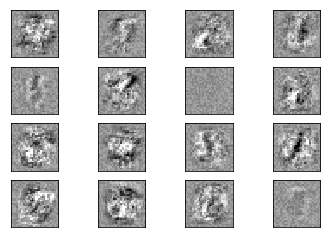

In [52]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

## Regression

Data exploration on the Bike Sharing Demand dataset

In [53]:
from sklearn.datasets import fetch_openml

bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
df = bike_sharing.frame

In [54]:
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0000,16.0
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,40.0
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,32.0
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,13.0
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1.0,12.0,19.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,119.0
17375,spring,1.0,12.0,20.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,89.0
17376,spring,1.0,12.0,21.0,False,1.0,True,clear,10.66,12.880,0.60,11.0014,90.0
17377,spring,1.0,12.0,22.0,False,1.0,True,clear,10.66,13.635,0.56,8.9981,61.0


To get a quick understanding of the periodic patterns of the data, let us have a look at the average demand per hour during a week.

In [55]:
average_week_demand = df.groupby(["weekday", "hour"]).mean()
average_week_demand['count']

weekday  hour
0.0      0.0      93.990385
         1.0      77.432692
         2.0      61.627451
         3.0      31.144231
         4.0       9.362745
                    ...    
6.0      19.0    239.932692
         20.0    180.865385
         21.0    156.000000
         22.0    139.663462
         23.0    115.855769
Name: count, Length: 168, dtype: float64

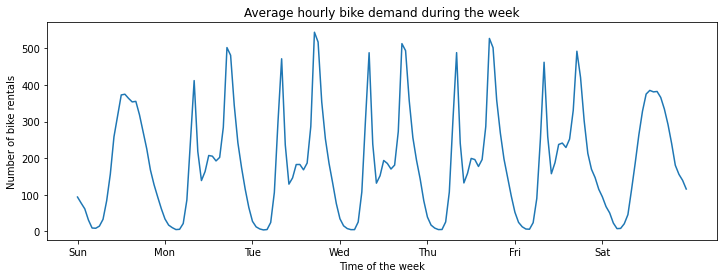

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df.groupby(["weekday", "hour"]).mean()["count"]
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

# What are we predicting?
# The target of the prediction problem is the absolute count of bike rentals on an hourly basis

Let us **rescale the target variable (number of hourly bike rentals) to predict a relative demand so that the mean absolute error is more easily interpreted as a fraction of the maximum demand**.

In [57]:
X = df.drop("count", axis="columns")
y = df["count"] / df["count"].max()

In [58]:
X

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0000
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1.0,12.0,19.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014
17375,spring,1.0,12.0,20.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014
17376,spring,1.0,12.0,21.0,False,1.0,True,clear,10.66,12.880,0.60,11.0014
17377,spring,1.0,12.0,22.0,False,1.0,True,clear,10.66,13.635,0.56,8.9981


In [59]:
y

0        0.016377
1        0.040942
2        0.032753
3        0.013306
4        0.001024
           ...   
17374    0.121801
17375    0.091095
17376    0.092119
17377    0.062436
17378    0.050154
Name: count, Length: 17379, dtype: float64

In [60]:
X['weather'].value_counts()

clear         11413
misty          4544
rain           1419
heavy_rain        3
Name: weather, dtype: int64

There are only 3 "heavy_rain" events, we cannot use this category to train machine learning models with cross validation. Instead, we simplify the representation by collapsing those into the "rain" category

In [61]:
X["weather"].replace(to_replace="heavy_rain", value="rain", inplace=True)
print(X["weather"].value_counts())

clear    11413
misty     4544
rain      1422
Name: weather, dtype: int64


In [62]:
len(X)

17379

**Time-based cross-validation**

Since the dataset is a time-ordered event log (hourly demand), we will use a time-sensitive cross-validation splitter to evaluate our demand forecasting model as realistically as possible. We use a gap of 2 days between the train and test side of the splits. We also limit the training set size to make the performance of the CV folds more stable.

1000 test datapoints should be enough to quantify the performance of the model. This represents a bit less than a month and a half of contiguous test data:

### Toy Example

In [27]:
import numpy as np
M = np.random.randn(12, 2)
N = np.random.randint(0, 2, 12)
M, N

(array([[ 0.26156203,  0.23447953],
        [-0.6563857 ,  0.09029192],
        [ 0.26040574, -0.73322529],
        [ 0.5322651 ,  0.13189719],
        [-1.46176672, -0.59344056],
        [ 0.53362223,  0.3813308 ],
        [ 0.41342823, -0.08070451],
        [-0.02955446,  1.7078899 ],
        [-0.58504075,  1.42080325],
        [ 1.02405651, -1.24969369],
        [-1.95276523,  0.59228094],
        [ 0.95242247,  0.51975943]]),
 array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]))

In [28]:
tscv = TimeSeriesSplit(n_splits=3, test_size=2, gap=2)
for train_index, test_index in tscv.split(M):
  print("TRAIN:", train_index, "TEST:", test_index)
  M_train, M_test = M[train_index], M[test_index]
  N_train, N_test = N[train_index], N[test_index]
  print(M_train.shape, M_test.shape, N_train.shape, N_test.shape)


TRAIN: [0 1 2 3] TEST: [6 7]
(4, 2) (2, 2) (4,) (2,)
TRAIN: [0 1 2 3 4 5] TEST: [8 9]
(6, 2) (2, 2) (6,) (2,)
TRAIN: [0 1 2 3 4 5 6 7] TEST: [10 11]
(8, 2) (2, 2) (8,) (2,)


In [63]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=48,                 # Number of samples to exclude from the end of each train set before the test set.
    max_train_size=10000,
    test_size=1000,
)

In [64]:
all_splits = list(ts_cv.split(X, y))
len(all_splits)

5

In [65]:
train_0, test_0 = all_splits[0]
train_0.shape, test_0.shape

((10000,), (1000,))

In [66]:
train_1, test_1 = all_splits[1]
train_1.shape, test_1.shape

((10000,), (1000,))

**Task**: Manually inspect the various splits to check that the TimeSeriesSplit works as we expect

In [ ]:
# Check list(ts_cv.split(X, y))



For categorical variables, use One Hot Encoding:

In [67]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

categorical_columns = [
    "weather",
    "season",
    "holiday",
    "workingday",
]

For the periodic features, we need to encode them with the matching period. We can use sine and cosine transformation, or alternatively encode the periodic time-related features using spline transformations with a large enough number of splines:

Check https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.SplineTransformer.html for more details.

![picture](https://slideplayer.com/slide/4635359/15/images/4/Spline+Interpolation+Cubic+interpolation+7th-order+5th-order.jpg)

In [41]:
import numpy as np
from sklearn.preprocessing import SplineTransformer
X = np.arange(6).reshape(6, 1)
spline = SplineTransformer(degree=2, n_knots=3)
print(spline.fit_transform(X).shape)
spline.fit_transform(X)

(6, 4)


array([[0.5 , 0.5 , 0.  , 0.  ],
       [0.18, 0.74, 0.08, 0.  ],
       [0.02, 0.66, 0.32, 0.  ],
       [0.  , 0.32, 0.66, 0.02],
       [0.  , 0.08, 0.74, 0.18],
       [0.  , 0.  , 0.5 , 0.5 ]])

In [43]:
spline = SplineTransformer(degree=3, n_knots=4) # Degree - 1 + Knots
print(spline.fit_transform(X).shape)

(6, 6)


In [68]:
from sklearn.preprocessing import SplineTransformer
# Generate univariate B-spline bases for features.
# Generate a new feature matrix consisting of n_splines=n_knots + degree - 1 
# (n_knots - 1 for extrapolation="periodic") spline basis functions (B-splines) 
# of polynomial order=`degree` for each feature.


# In mathematics, a spline is a special function defined piecewise by polynomials. 
# In interpolating problems, spline interpolation is often preferred to polynomial 
# interpolation because it yields similar results, even when using low degree polynomials

# The values of x where the pieces of polynomial meet are known as knots,

def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1  # periodic and include_bias is True
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True,
    )

We can now build a predictive pipeline using this alternative periodic feature engineering strategy.

In [69]:
from sklearn.compose import ColumnTransformer
# Applies transformers to columns of an array or pandas DataFrame.
# This estimator allows different columns or column subsets of the input to be transformed separately 
# and the features generated by each transformer will be concatenated to form a single feature space. 
# This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms 
# or transformations into a single transformer.
import numpy as np
from sklearn.preprocessing import MinMaxScaler

cyclic_spline_transformer = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, categorical_columns),
        ("cyclic_month", periodic_spline_transformer(12, n_splines=6), ["month"]),
        ("cyclic_weekday", periodic_spline_transformer(7, n_splines=3), ["weekday"]),
        ("cyclic_hour", periodic_spline_transformer(24, n_splines=12), ["hour"]),
    ],
    remainder=MinMaxScaler(),
)

Prepare the evaluation script. We evaluate our  model with the mean absolute error of the relative demand averaged across our 5 time-based cross-validation splits

In [70]:
from sklearn.model_selection import cross_validate

def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

Train and evaluate an MLPRegressor:

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor

cyclic_spline_mlp_pipeline = make_pipeline(
    cyclic_spline_transformer,
    MLPRegressor(random_state=1, max_iter=500),
)
evaluate(cyclic_spline_mlp_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.061 +/- 0.011
Root Mean Squared Error: 0.084 +/- 0.011


Visualize some predictions:

In [74]:
cyclic_spline_mlp_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
cyclic_spline_mpl_predictions = cyclic_spline_mlp_pipeline.predict(X.iloc[test_0])

TypeError: ignored

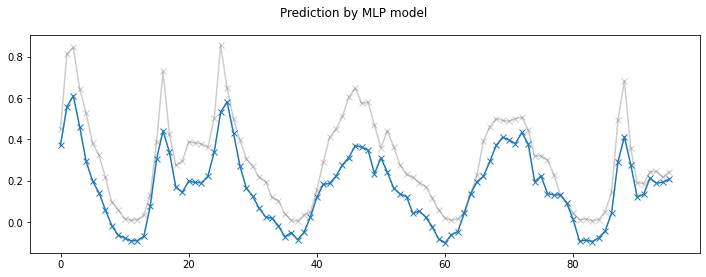

In [78]:
last_hours = slice(-96, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Prediction by MLP model")
ax.plot(
    y.iloc[test_0].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual demand",
    color="black",
)
ax.plot(ax.plot(cyclic_spline_mpl_predictions[last_hours], "x-", label="MLP model")
[last_hours], "x-", label="MLP model")
_ = ax.legend()

**Task:** Experiment with different MLPRegressor parameters and plot your best results in the above plot.